In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

Welcome to JupyROOT 6.18/04


In [2]:
#!jupyter nbconvert --to script RooFit_fit.ipynb

In [3]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [4]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

# start fitting using RooFit and HistFactory class

# Start fitting

In [5]:

def MakeCovarianceMatrix(path_,file_):

  #Open the RooFitResult of the specified version
  f = ROOT.TFile(path_+file_)
  rfr = f.Get("result")

  #Grab the covariance matrix
  covMat = rfr.covarianceMatrix()
  pars = rfr.floatParsFinal()

  #Fill the histogram. That's all!
  file =  ROOT.TFile(path_+'covmatrix.root',"recreate")
  covHist =  ROOT.TH2D("cov","cov",pars.getSize(),0,pars.getSize(),pars.getSize(),0,pars.getSize())

  #Also save a histogram of the central values
  cen = ROOT.TH1D("cen","cen",pars.getSize(),0,pars.getSize())
  for i in range(pars.getSize()): #(int i=0;i<pars.getSize();i++)
    covHist.GetXaxis().SetBinLabel(i+1,pars.at(i).GetName())
    covHist.GetYaxis().SetBinLabel(i+1,pars.at(i).GetName())
    for j in range(pars.getSize()): #(int j=0;j<pars.getSize();j++)
      covHist.SetBinContent(i+1,j+1,covMat[i][j])
  cen.GetXaxis().SetBinLabel(i+1,pars.at(i).GetName())
  cen.SetBinContent(i+1,pars.at(i).getVal())


  #Write to file
  file.Write()

  covHist.SetStats(0)
  covHist.Draw("colz")
  c1.Draw()
  c1.SaveAs(path_ + 'covmatrix.png')
  #c1.SaveAs(path_ + 'covmatrix.png')
  #c1.SaveAs(path_ + 'covmatrix.png')
  return covHist

AttributeError: 'PyROOT_NoneType' object has no attribute 'Draw'


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/workspaces/ProfiledUnfolding/covmatrix.png has been created


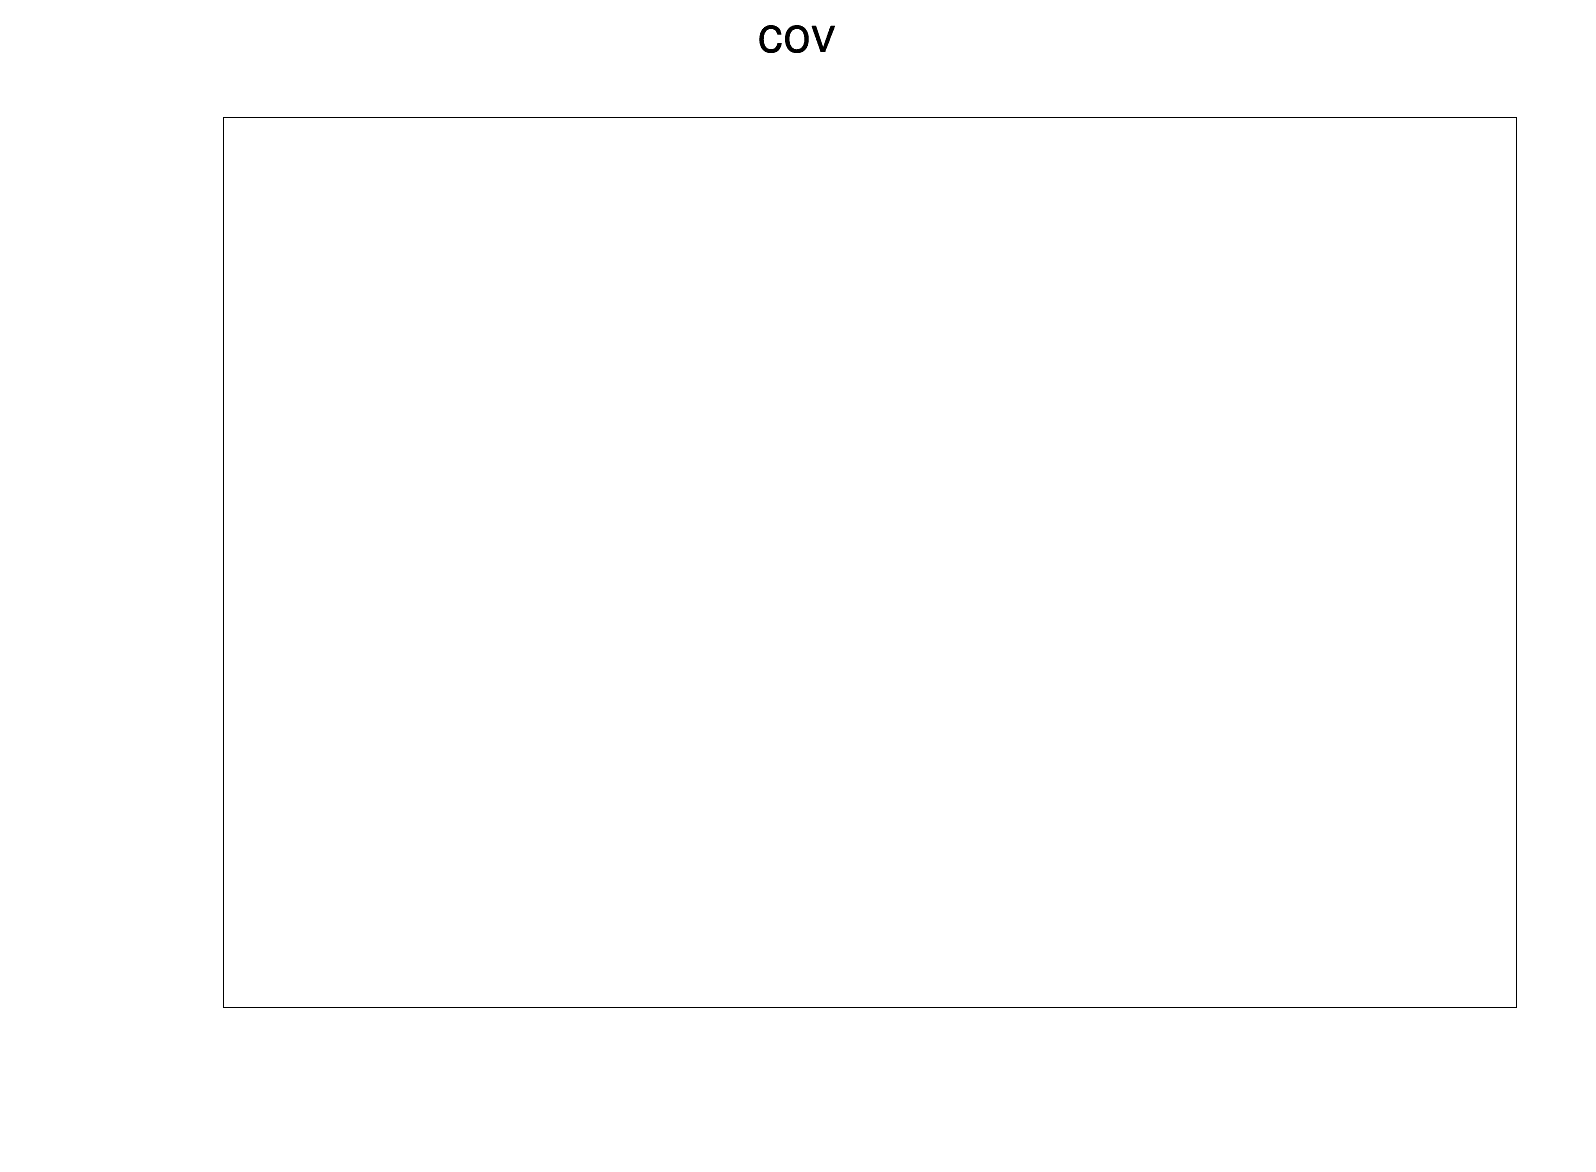

In [6]:
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_rooFit/workspaces/ProfiledUnfolding/' 
file_name = 'fit.root'

h_cov = MakeCovarianceMatrix(outputdir,file_name)
h_cov.Draw('colz')
c1.Draw()